<a href="https://colab.research.google.com/github/sehaj1001/intro_ml/blob/main/Sehajpreet_Kaur_IML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1 (a) PDF attached separately.

Q2 (i) and (ii) The code is in the next few sections. I have used scikit-learn for creating the Decision Tree and Random Forest Classifiers. The data has been shuffled before splitting it between Train and Test to ensure that the testing data is representative. Both the Classifiers use entropy to measure information gain.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.model_selection import train_test_split # To split the data between Train and Test
from sklearn import metrics  # To calculate accuracy
from sklearn.utils import shuffle  # To shuffle the dataframe

In [ ]:
data = pd.read_csv("wisconsin_dataset.csv") # load dataset
data = shuffle(data)  # shuffle the dataset

In [ ]:
input = data.iloc[:, 2:-1]  # Attribute columns
output = data["diagnosis"]  # Diagnosis/Classification

In [ ]:
# Split the data between Train and Test (4:1)
input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.2, random_state=1)

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')  # Create the Decision Tree Classifier Object using Entropy

clf = clf.fit(input_train, output_train)  # Train the Decision Tree Classifier

prediction = clf.predict(input_test)  # Predict the diagnosis for test dataset


In [ ]:
# Model Accuracy as a measure of Performance
print("Accuracy of the Decision Tree Classifier:", metrics.accuracy_score(output_test, prediction))

Accuracy of the Decision Tree Classifier: 0.9210526315789473


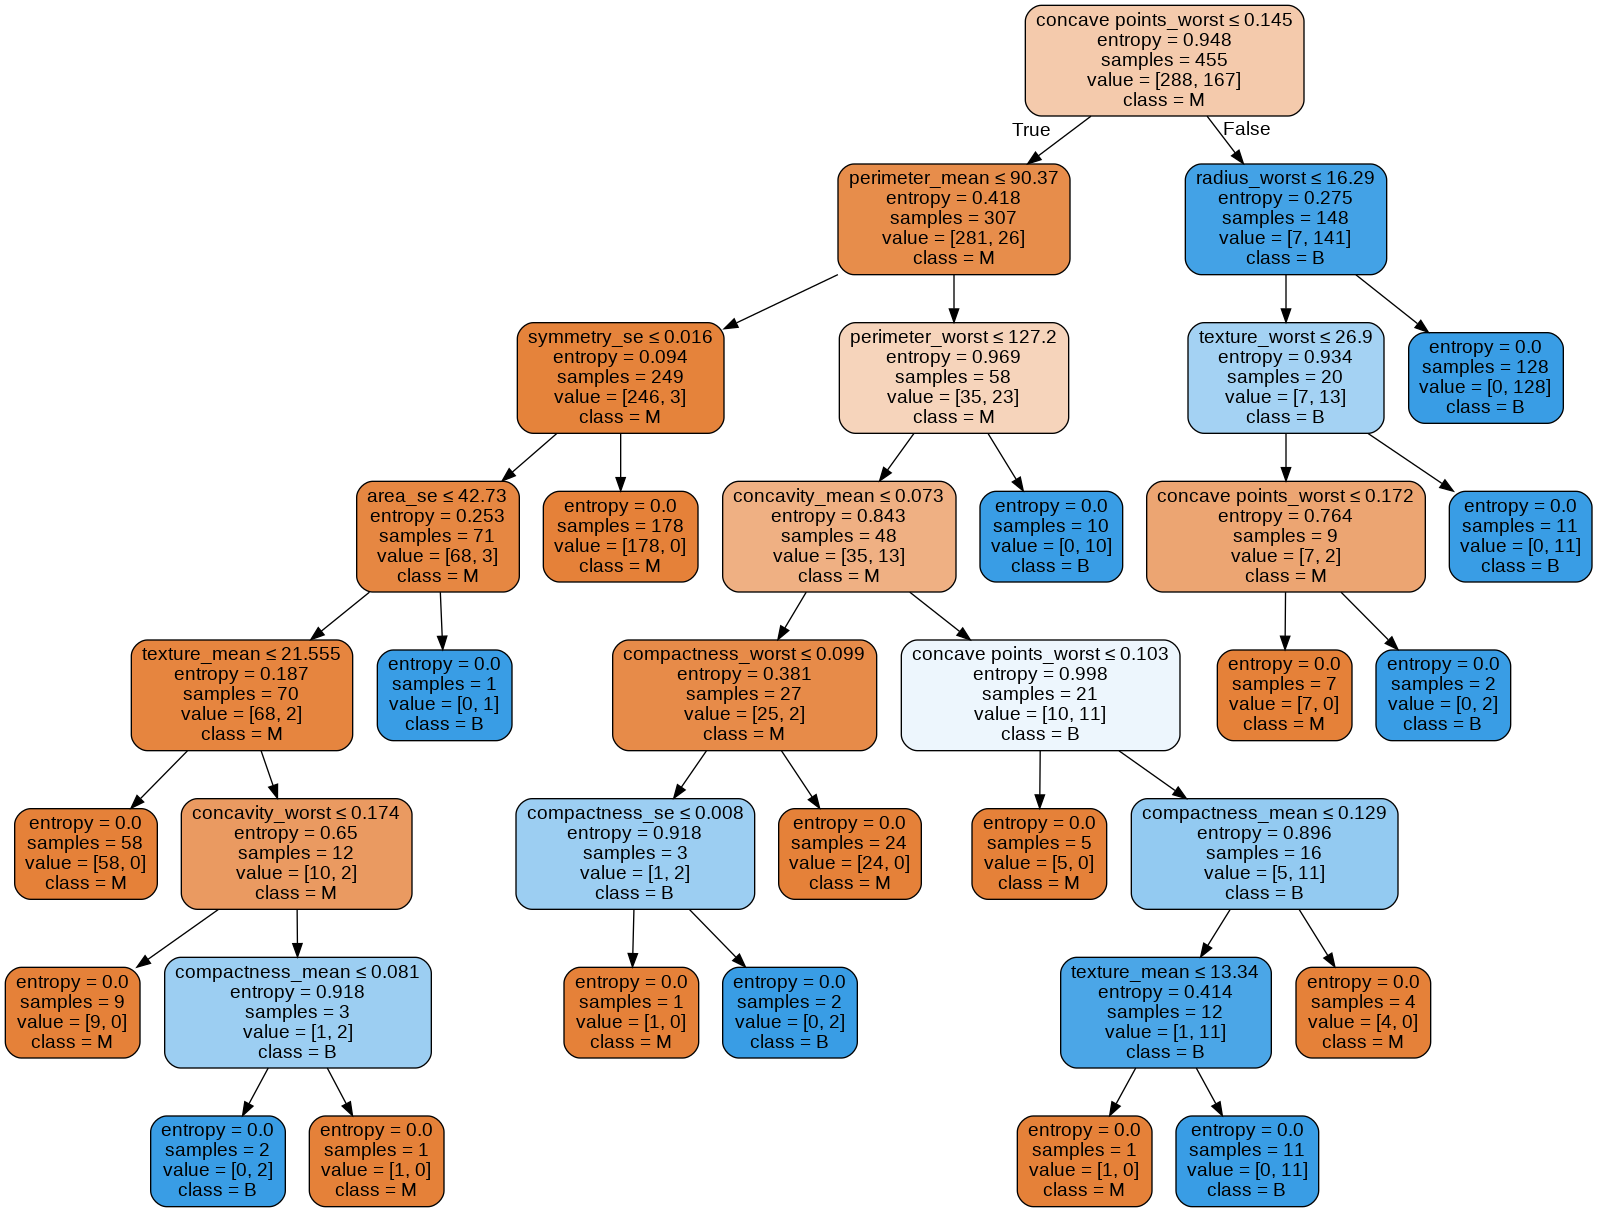

In [ ]:
#plot the decision tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(input.columns),class_names=['M','B'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [ ]:
clf = RandomForestClassifier(n_estimators=100, criterion='entropy')  # Create a Random Forest Classifier Object with 100 Trees

clf = clf.fit(input_train, output_train)  # Train the Random Forest Classifier

prediction = clf.predict(input_test)  # Predict the diagnosis for test dataset

In [ ]:
# Model Accuracy as a measure of Performance
print("Accuracy of the Random Forest Classifier:", metrics.accuracy_score(output_test, prediction))  

Accuracy of the Random Forest Classifier: 0.9649122807017544


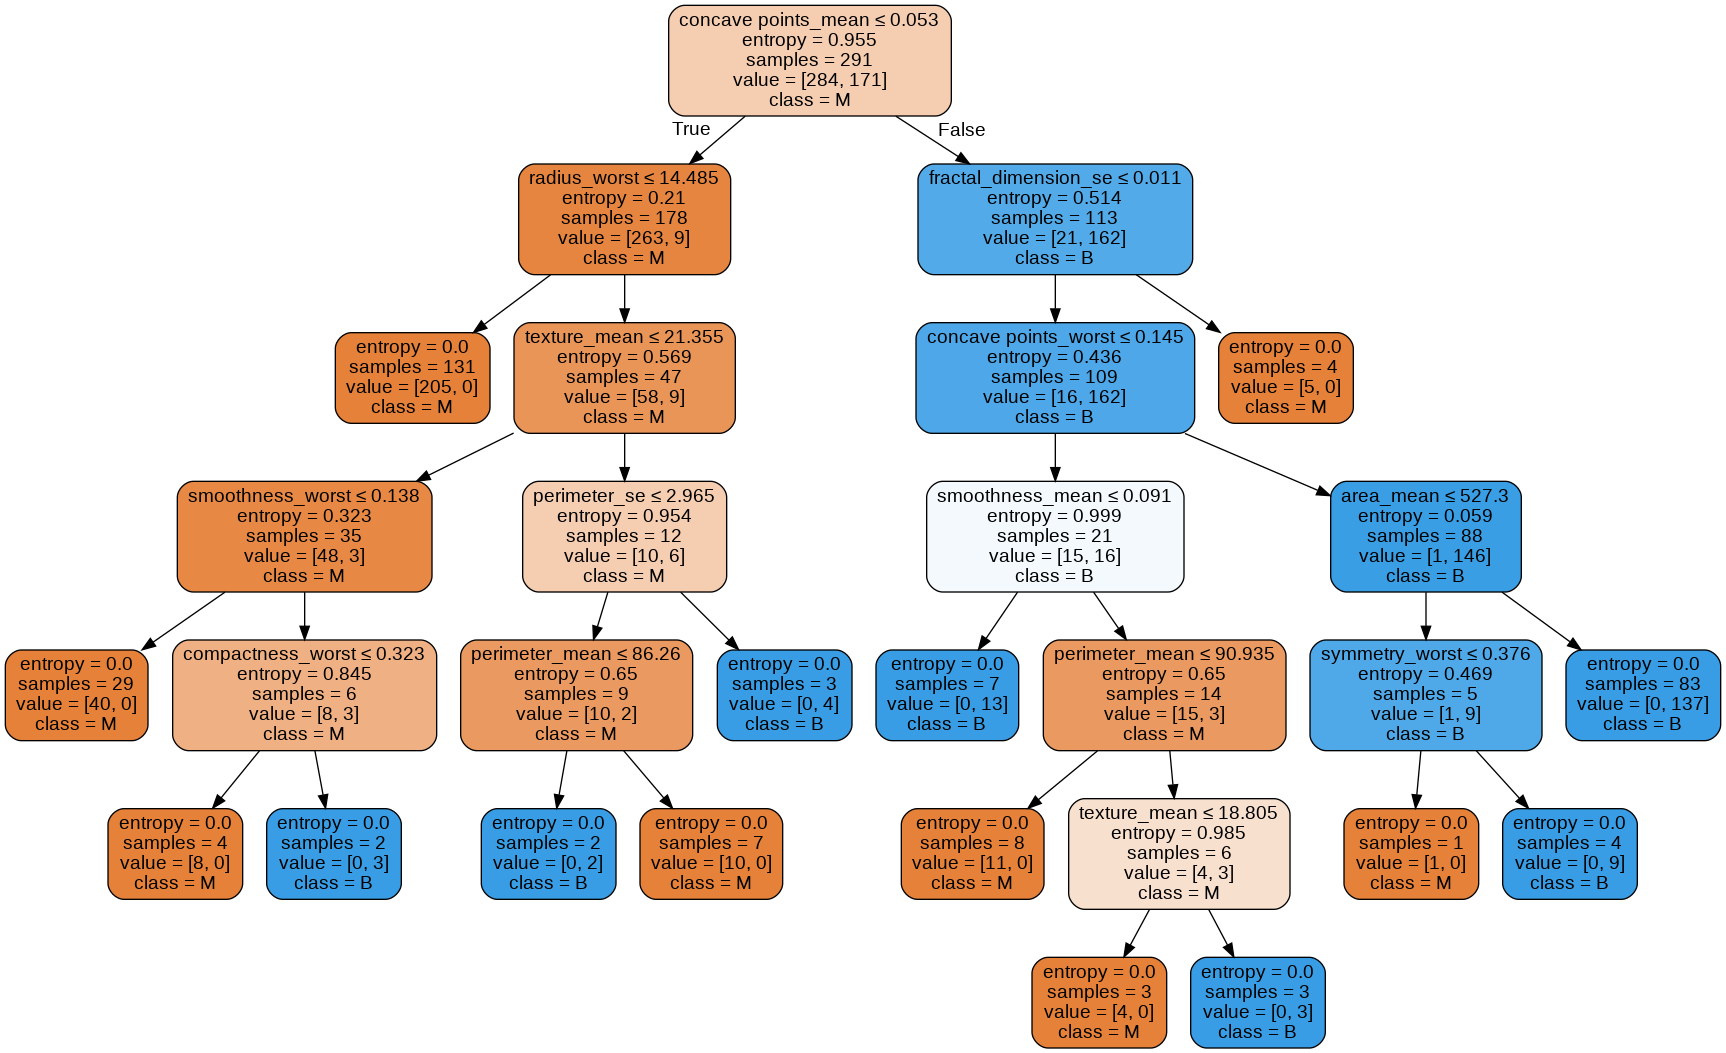

In [ ]:
#plot a tree from the random forest (arbritrarily chosen any tree 0 <= i < 100)

dot_data = StringIO()
export_graphviz(clf.estimators_[3], out_file=dot_data,  # can change clf.estimators_[i] to visualise different trees in the forest
                filled=True, rounded=True,
                special_characters=True,feature_names = list(input.columns),class_names=['M','B'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('random_forest_tree.png')
Image(graph.create_png())

Q2 (iii) Since they are both using entropy to measure information gain, we can compare their performances on the same training and testing data. We can see that the performance of the Random Forest Classifier with 100 trees is reasonably better than that of the Decision Tree Classifier. 

The former's accuracy while classifying the test dataset is over 4% more (96.5% vs 92.1%). Since the Random Forest involves creating multiple Decision Trees (100 in this case) using subsets of the given training data and then averages the outputs of each, it leads to better predictive accuracy and controls over fitting. 

Also, over a number of iterations, it can be observed that the accuracy of the Decision Tree varies between 89 to 96 (these are not absolute limits and the variation may be more across a greater number of iterations) while that of the Random Forest also varies but within a much smaller limit of around 93 to 97 which shows that the Forest is more relaible and much less dependent on the shuffling of the data.